In [1]:
from os.path import join
from glob import glob

from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler

# from nilearn import image, plotting
# from nilearn.maskers import NiftiLabelsMasker

from subprocess import getoutput

---

In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

---

In [55]:
dir_csv = '/home/sungbeenpark/Github/labs/SMC'
dir_root = '/mnt/ext5/SMC'
dir_behav = join(dir_root,'behav_data')
# dir_fmri = '/mnt/ext5/SMC/fmri_data/'
# dir_mask = join(dir_fmri, 'masks')
# dir_corr = join(dir_fmri, 'stats/correlations/lHP')

---

In [4]:
## Valid participant list
list_subj = [
    '12', '17', '18', '19', '20',
    '22', '24', '25', '27', '31',
    '32', '33', '36', '37', '38',
    '40', '43', '46', '47', '48',
]
# ## Valid participant list for a post phase
# list_subj = [
#     '10', '11',
#     '12', '17', '18', '19', '20',
#     '22', '24', '25', '27', '31',
#     '32', '33', '36', '37', '38',
#     '40', '43', '46', '47', '48',
# ]

---

In [5]:
df = pd.read_excel(
    join(dir_csv,'SMC_behav.xlsx')
#     , index_col='tms_id'
)
df.set_index(['tms_id'], inplace=True)
tmp = df.drop([
    'c0_t1', 'APOE4carrier=1, non-carrier=0', 'CANTAB-3', 'CANTAB1', 'CANTAB2',
    'DM', 'HTN', 'Hyperlipidemia', 'MRI-2', 'PET or CSF', 'Result',
    'Type', 'age', 'birthdate', 'cardiac disease', 'diagnosis',
    'education year', 'enrollment No', 'initial ',
    'screening no ', 'sex', 'stroke', '연구종료', '영상전달 '
], axis=1, inplace=False)

## baseline
df1 = tmp[tmp.no==1]
## 4 weeks later
df2 = tmp[tmp.no==2]
## 8 weeks later
df3 = tmp[tmp.no==3]

print(df.columns)
print(tmp.columns)
df

Index(['enrollment No', 'no', 'c0_t1', 'mmse_', 'moca_', 'adascog_',
       'cowatsementicanimal_', 'cowatsemanticmarker_', 'cowatphonemicgieog_',
       'cowatphonemiceuong_', 'cowatphonemicsiot_', 'ktmte_parta_time_',
       'ktmte_partb_time_', 'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_',
       'cdr_sob_', 'siadl_present_', 'screening no ', 'initial ', 'sex', 'age',
       'birthdate', 'education year', 'diagnosis', 'PET or CSF', 'Type',
       'Result', 'CANTAB1', 'CANTAB2', 'MRI-2', '영상전달 ', 'CANTAB-3', '연구종료',
       'APOE4carrier=1, non-carrier=0', 'HTN', 'DM', 'Hyperlipidemia',
       'cardiac disease', 'stroke'],
      dtype='object')
Index(['no', 'mmse_', 'moca_', 'adascog_', 'cowatsementicanimal_',
       'cowatsemanticmarker_', 'cowatphonemicgieog_', 'cowatphonemiceuong_',
       'cowatphonemicsiot_', 'ktmte_parta_time_', 'ktmte_partb_time_',
       'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_', 'cdr_sob_',
       'siadl_present_'],
      dtype='object')


,enrollment No,no,c0_t1,mmse_,moca_,adascog_,cowatsementicanimal_,cowatsemanticmarker_,cowatphonemicgieog_,cowatphonemiceuong_,...,MRI-2,영상전달,CANTAB-3,연구종료,"APOE4carrier=1, non-carrier=0",HTN,DM,Hyperlipidemia,cardiac disease,stroke
tms_id,,,,,,,,,,,,,,,,,,,,,
S05,SMC-20-D009-02,1,0,25,23,26,16,7,16,13,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S05,SMC-20-D009-02,2,0,22,21,26,13,10,13,16,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S05,SMC-20-D009-02,3,0,23,22,27,13,14,17,14,...,2020-09-14,완료,2020-10-06,완료,1.0,0,0,0,0,0
S06,SMC-20-D010-03,1,0,19,17,32,9,5,11,3,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
S06,SMC-20-D010-03,2,0,21,17,38,5,5,7,3,...,2020-09-15,완료,2020-10-06,완료,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S48,SMC-20-D009-43,2,1,27,23,18,12,24,16,21,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
S48,SMC-20-D009-43,3,1,27,25,14,15,21,18,19,...,2022-05-23,NaN,2022-06-11,완료,1.0,0,0,1,0,0
S50,SMC-20-D009-45,1,1,23,19,35,4,6,7,5,...,2022-04-18,NaN,2022-05-19,완료,1.0,0,0,1,0,0


In [6]:
dg = df.c0_t1.groupby(['tms_id']).mean().astype(int).to_frame()
dg

,c0_t1
tms_id,
S05,0
S06,0
S09,1
S10,0
S11,1
S12,1
S14,0
S15,1
S17,0


---

In [7]:
tmp = df2-df1
tmp.reset_index(inplace=True)
for subj in tmp.tms_id:
    nn = subj[1:]
    if not nn in list_subj:
        tmp.drop(tmp[tmp.tms_id==subj].index, inplace=True)
tmp.set_index('tms_id', inplace=True)
tmp

,no,mmse_,moca_,adascog_,cowatsementicanimal_,cowatsemanticmarker_,cowatphonemicgieog_,cowatphonemiceuong_,cowatphonemicsiot_,ktmte_parta_time_,ktmte_partb_time_,stroop_word_,stroop_color_,sgds_,cdr_,cdr_sob_,siadl_present_
tms_id,,,,,,,,,,,,,,,,,
S12,1,2,-3,-2,1,5,6,3,1,13,30,0,23,-2,0.0,1.0,3
S17,1,-1,-4,4,0,2,-3,0,-1,-14,-26,-1,-32,0,0.0,0.5,3
S18,1,-1,-4,1,-3,0,1,1,-2,22,0,-62,2,1,0.0,1.0,0
S19,1,-2,1,-3,-3,4,-2,0,1,4,0,0,0,-1,0.0,0.0,0
S20,1,-3,-1,-1,0,2,2,-1,-2,-1,-47,6,-6,0,0.0,0.0,1
S22,1,0,2,-5,-6,-1,6,0,1,3,13,0,0,-2,0.0,0.0,0
S24,1,-2,0,0,2,-2,2,-1,-1,23,16,0,-7,0,0.0,0.0,2
S25,1,0,1,1,3,1,1,-4,-1,-1,-2,-68,3,-4,0.0,0.5,0
S27,1,5,-1,-5,0,3,4,3,3,-1,26,0,-54,0,0.5,0.5,1


---

In [12]:
dh = tmp
for subj in dh.index:
    group = df.loc[subj,'c0_t1'].unique()[0]
    dh.loc[subj,'c0_t1'] = 'Stim' if group==1 else ('Sham' if group==0 else 'invalid')

hue = [
    'mmse_', 'moca_', 'adascog_', 'cowatsementicanimal_',
    'cowatsemanticmarker_', 'cowatphonemicgieog_', 'cowatphonemiceuong_',
    'cowatphonemicsiot_', 'ktmte_parta_time_', 'ktmte_partb_time_',
    'stroop_word_', 'stroop_color_', 'sgds_', 'cdr_', 'cdr_sob_','siadl_present_'
]

dh = pd.melt(
    dh, ignore_index=False,
    id_vars=['no','c0_t1'],
    value_vars=hue
)

dh.reset_index(inplace=True)

for h in hue:
    a = dh[(dh.c0_t1=='Sham')&(dh.variable==h)].value
    b = dh[(dh.c0_t1=='Stim')&(dh.variable==h)].value
    tval, pval = stats.ttest_ind(a,b,alternative='two-sided')
    print('%s: %.3f (%s)'%(h,pval,convert_pvalue_to_asterisks(pval)))
    if not pval < 0.05:
        dh.drop(dh[dh.variable==h].index, inplace=True)

dh

mmse_: 0.552 (ns)
moca_: 0.450 (ns)
adascog_: 0.284 (ns)
cowatsementicanimal_: 0.626 (ns)
cowatsemanticmarker_: 0.596 (ns)
cowatphonemicgieog_: 0.435 (ns)
cowatphonemiceuong_: 0.226 (ns)
cowatphonemicsiot_: 0.290 (ns)
ktmte_parta_time_: 0.314 (ns)
ktmte_partb_time_: 0.936 (ns)
stroop_word_: 0.047 (*)
stroop_color_: 0.044 (*)
sgds_: 0.783 (ns)
cdr_: 0.230 (ns)
cdr_sob_: 0.376 (ns)
siadl_present_: 0.297 (ns)


,tms_id,no,c0_t1,variable,value
200,S12,1,Stim,stroop_word_,0.0
201,S17,1,Sham,stroop_word_,-1.0
202,S18,1,Sham,stroop_word_,-62.0
203,S19,1,Stim,stroop_word_,0.0
204,S20,1,Sham,stroop_word_,6.0
205,S22,1,Stim,stroop_word_,0.0
206,S24,1,Sham,stroop_word_,0.0
207,S25,1,Sham,stroop_word_,-68.0
208,S27,1,Sham,stroop_word_,0.0
209,S31,1,Stim,stroop_word_,0.0


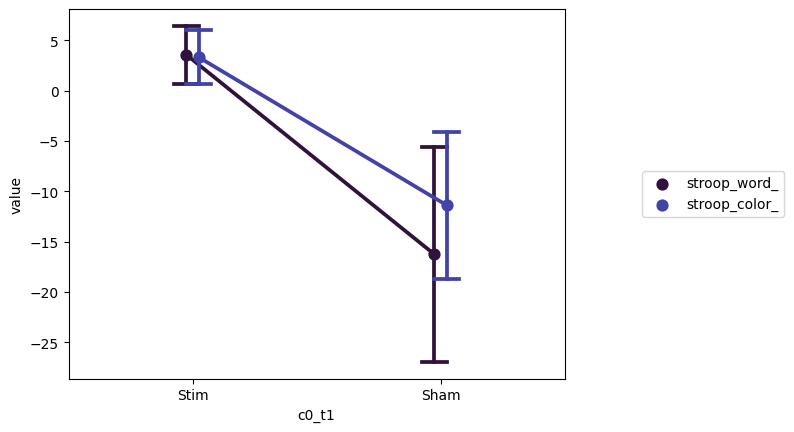

In [13]:
g = sns.pointplot(
    data=dh,
    x='c0_t1', y='value',
    hue='variable', palette=cm.turbo(np.linspace(0,1,len(hue))),
    errorbar='se', capsize=0.1,
    dodge=True
)

g.legend(bbox_to_anchor=(1.3, 0.5), loc='center', ncol=1)

---

In [66]:
scaler = StandardScaler()
for eval_ in dh.variable.unique():
    a = dh[dh.variable==eval_].value
    b = scaler.fit_transform(a.values.reshape(-1,1))
    fname=join(dir_behav,'%s.n%02d.txt'%(eval_,len(dh.tms_id.unique())))
    np.savetxt(
        fname=fname,
        X=b.reshape(-1),
        fmt='%.5e'
    )